# Yelp Data Challenge - Clustering and PCA
Meina Wang

Mar 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('dataset/last_1_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-02-12,1,heZd0W3HuPJxZBrCYD3wDw,2,"Lousy steak. \n\nThe service was great - Todd,...",3,OtKA03ALQQ1CBhtaJod_Jw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-12-10,0,exzXjy7Y2ICX_BEVTDWpJA,5,I got the filet mignon with seared foigras and...,0,Ymtd4cQypep_QZJ-qJsHuA


## 1. Cluster the review text data for all the restaurants

### Define feature variables - text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

### Define target variable - rating

In [5]:
# Make a column and take the values, save to a variable named "target"
df['favorable'] = (df['stars'] > 4)
target = df['favorable'].values

In [6]:
target.mean()

0.49041002371746206

### Create training dataset and test dataset

In [7]:
from sklearn.cross_validation import train_test_split

/Users/meinawang/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
documents_train, documents_test, target_train, target_test = train_test_split(
    documents,
    target,
    test_size = 0.3,
    random_state = 7
)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# Create TfidfVectorizer, choose max_features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [11]:
# Train the model with training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()

In [12]:
# Get the vocab of tfidf
words = vectorizer.get_feature_names()

In [13]:
# Use the trained model to transform all the reviews
vectors_documents = vectorizer.transform(documents).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=42) # default n_clusters = 8
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Make predictions on all data

In [15]:
assigned_cluster = kmeans.predict(vectors_documents)

In [16]:
print assigned_cluster

[0 0 4 ... 6 6 0]


#### Inspect the centroids
Print out the centroids of the Kmeans clustering.

In [17]:
print kmeans.cluster_centers_

[[ 1.75576451e-03  1.23254775e-04  1.70663184e-04 ...  7.48527422e-04
   1.25524531e-04  4.85477851e-04]
 [ 1.73576566e-03 -1.02186055e-17  2.83105420e-04 ...  4.01777446e-04
   7.32492374e-05  1.01421188e-04]
 [ 1.72873858e-03  7.85323813e-05  1.48827726e-04 ...  7.68178974e-04
   2.18822761e-04  1.02217040e-03]
 ...
 [ 3.52728662e-03  1.60250561e-04  6.70462259e-04 ...  3.12978808e-03
   1.30562759e-04  3.28387652e-04]
 [ 2.42713448e-03 -4.35036122e-18  1.36818824e-04 ...  7.61202689e-04
   1.66805038e-04  2.23270837e-04]
 [ 2.52446756e-03  3.02060448e-04  1.85210220e-04 ...  7.06779883e-04
   5.21831477e-05  2.03249454e-03]]


Above shown are just vectors.  To make any sense of them, I map these vectors back into our 'word space'.  

Each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [18]:
n = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n:-1]

In [19]:
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print (num,",".join(words[i] for i in centroid))

top features for each cluster:
(0, u'good,food,place,vegas,best,service,like,delicious,really')
(1, u'sushi,rolls,place,roll,ayce,good,great,fresh,service')
(2, u'chicken,good,rice,fried,food,place,ordered,thai,ramen')
(3, u'pizza,crust,good,place,great,cheese,slice,order,best')
(4, u'great,food,service,place,amazing,good,friendly,definitely,staff')
(5, u'order,food,minutes,time,service,just,came,didn,said')
(6, u'tacos,taco,asada,carne,good,food,pastor,place,salsa')
(7, u'burger,fries,burgers,good,place,cheese,shake,food,great')


#### Try different k
Try set k to a different number, how would the top features change?

In [20]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [21]:
assigned_cluster = kmeans.predict(vectors_documents)

In [22]:
n = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print (num,",".join(words[i] for i in centroid))

top features for each cluster:
(0, u'pizza,crust,good,place,great,cheese,slice,order,ordered')
(1, u'great,food,service,place,good,amazing,definitely,friendly,atmosphere')
(2, u'food,order,time,service,minutes,just,came,didn,like')
(3, u'burger,fries,burgers,good,place,cheese,shake,food,great')
(4, u'place,food,best,amazing,vegas,love,service,sushi,delicious')
(5, u'good,food,chicken,like,place,really,ordered,just,service')


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [23]:
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [24]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print "=" * 10
    print "Cluster %d:" % i
    for review_index in sample_reviews:
        print df.ix[review_index]['stars'],
        print df.ix[review_index]['text']
    print

Cluster 0:
5 I popped into Pisa Pizza tonight for a quick slice and I have to say I was pleasantly surprised. Im usually a NY style thin crust kinda girl, but their dough is just tooooooooo good !! Great location on the strip. I will definitely stop by here again !
5 It was a delicious meal! Went here after hiking to one of the many peaks of red rock. We ordered a large meat pizza for four and we took 4 1/2 slices home. Pizza was definitely worth the price! The only downside was that we had to use the restroom next door. But I think this place gets more of a delivery and or takeout kind of place :) but definitely recommend this place to anyone who wants yummy pizza!

Cluster 1:
5 Even though this spot is relatively new, I wouldn't hesitate to call it one of the city's finest. Everything is fresh and delicious as well as reasonably priced. The staff is very friendly and helpful, and some of the views from the outside patio are great. The service was excellent. Can't wait to make a retur

/Users/meinawang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


## 2. Cluster all the reviews of the most reviewed restaurant
Find the most reviewed restaurant and analyze its reviews

In [25]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
most_reviewed_restaurant = df['business_id'].value_counts().index[0]

In [26]:
df_top_restaurant = df[df['business_id'] == most_reviewed_restaurant].copy().reset_index()

In [27]:
df_top_restaurant

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,favorable
0,74377,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-07-02,0,Xci8QJaDOB7OazJIP9U0Cw,5,I'm staying at Caesar's Palace for 4th of July...,0,J90_7u_8vPYa03GMohNxAA,True
1,74378,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-04-17,0,Cvu2u-qIT1VNMywoV21ziA,5,Really loved this place! We heard great things...,0,i05OLRVJCeN3ZD1dIM2mrQ,True
2,74379,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-11-21,0,HwslccNX5sAKrw_rU7h5BQ,3,Very long wait. Once you pay you still have to...,0,vI1b3YI2NYYQzxKkhPx-kg,False
3,74380,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-07-01,0,Zy45ehOLmbOfv8OVpaJzGw,5,"Everything I ate was delicious, dim sum, chick...",0,tj4f7dbf803UjDejrs7eiQ,True
4,74381,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-08-06,1,0jb9KV2ESl0W6mHrYk02rw,2,Not sure what the hype is about here. I have d...,0,kEGXZcG2i4IcE3A_FdMI_Q,False
5,74382,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-11-20,0,TIDiONXhflr4qCZXBfFMtA,1,The worst buffet I have ever had. The worst th...,0,RQhAok-F4jGkBzC4ZTxNgw,False
6,74383,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,1,2017-05-31,0,1WRuzYwsnjMlcx2sBCJ3Pw,4,Heard lines were pretty long here and we were ...,1,3RTesI_MAwct13LWm4rhLw,False
7,74384,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-07-03,0,jOQSuLlaU2KOGHIDVvNeNQ,4,I've been here about 4 times now and I feel li...,1,ZajIvvSDcS7f1gsUcvJYiA,False
8,74385,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-03-22,0,p1IkUuRTFOnI3I27b1Sl1w,4,Didn't realize the wife and I been here twice....,0,V78AWd95_6_gEr8zq9z5AA,False
9,74386,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"[Sandwiches, Buffets, Restaurants, Breakfast &...",4.0,0,2017-11-25,0,4j3Poe0yXiryR0vZbS8QbQ,1,I am honestly giving this Buffet a 1 star just...,0,MpMcjmLeCF1ODE13FPkjoA,False


### Vectorize the text feature

In [28]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values
documents_top_restaurant.shape

(1293,)

### Define target variable - rating

In [29]:
target_top_restaurant = (df_top_restaurant['stars'] > 4).astype(int).values
target_top_restaurant.shape

(1293,)

#### Check the statistic of the target variable

In [32]:
print('statistics of the target variable')
print('mean value: %f' % (np.mean(target_top_restaurant)))
print('standard deviation value: %f' % (np.std(target_top_restaurant)))

statistics of the target variable
mean value: 0.381284
standard deviation value: 0.485702


### Create training dataset and test dataset

In [33]:
# documents_top_restaurant is X, target_top_restaurant is y
x_train, x_test, y_train, y_test = train_test_split(documents_top_restaurant, target_top_restaurant, 
                                                    test_size=0.4, random_state=7)

### Get NLP representation of the documents

In [81]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer_top = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [82]:
# Train the model with training data
train_vector_top = vectorizer_top.fit_transform(x_train).toarray()

In [83]:
# Get the vocab of tfidf
vocab_top = vectorizer_top.get_feature_names()

In [84]:
# Use the trained model to transform the test data
test_vector_top = vectorizer_top.fit_transform(x_test).toarray()

In [85]:
# Use the trained model to transform all the data
doc_vector_top = vectorizer_top.transform(documents_top_restaurant).toarray()

In [86]:
doc_vector_top.shape

(1293, 1000)

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [87]:
kmeans = KMeans(random_state=42)
kmeans.fit(train_vector_top)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Make predictions on all data

In [88]:
target_labels = kmeans.predict(doc_vector_top)

#### Inspect the centroids

In [89]:
print kmeans.cluster_centers_

[[ 2.64255511e-03  2.28483444e-02  1.46102675e-03 ...  9.87489463e-03
  -1.95156391e-18  1.14452710e-02]
 [ 1.95245605e-03  5.64182699e-03  1.58324309e-03 ...  6.51665653e-03
   3.53657323e-03  2.80436517e-03]
 [-5.20417043e-18  5.61136559e-03  4.99725035e-03 ...  2.47746724e-03
  -1.73472348e-18  3.77602458e-03]
 ...
 [ 8.44180933e-03  2.60532287e-02  3.57979627e-03 ...  4.73810376e-03
   3.31242587e-03  1.90685997e-03]
 [ 2.71963045e-03  9.17085094e-03  4.33680869e-19 ... -1.73472348e-18
  -1.51788304e-18  7.31098717e-03]
 [-3.90312782e-18  5.90730081e-03  4.33680869e-19 ...  2.11100932e-02
  -8.67361738e-19  8.33592412e-03]]


#### Find the top 10 features for each cluster.

In [90]:
n = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n:-1]


In [91]:
for num, centroid in enumerate(top_centroids):
    print (num,",".join(words[i] for i in centroid))

(0, u'closes,beware,birthday,chives,atmosphere,comes,bargain,accompanying,broccolini')
(1, u'accompanying,carson,alot,atmosphere,annoying,carpaccio,changed,ayce,cleared')
(2, u'95,cleared,accompanying,beignets,atmosphere,baguette,according,burning,clients')
(3, u'backed,atmosphere,casinos,carving,2x,accompanying,accommodating,angus,businesses')
(4, u'ayce,accompanying,alot,bear,atmosphere,benihana,cafe,appealing,best')
(5, u'beware,atmosphere,baba,accompanying,birthday,chives,blackened,burgers,comes')
(6, u'br\xfbl\xe9e,3rd,atmosphere,accompanying,2x,apologies,burgers,casinos,comes')
(7, u'bite,accompanying,95,atmosphere,carpaccio,br\xfbl\xe9e,carving,backed,38')


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [92]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print "=" * 10
    print "Cluster %d:" % i
    for review_index in sample_reviews:
        print df.ix[review_index]['stars'],
        print df.ix[review_index]['text']
    print

Cluster 0:
1 I will preface this review with the fact that I am Italian and I am from Long Island, N.Y (roll your eyes, but the fact remains I know great authentic Italian food)..

Ordered delivery from this establishment this evening via EAT24. I have been dying to try it.. as authentic Italian cuisine is obviously up my alley, especially on days when I don't feel like cooking. Ordered a margherita pizza, calamari, and tiramisu. I figured the old standbys should give me a sense of quality with this place.

Delivery was 20 minutes earlier than the EAT24 app estimated. Great!  Everything should be hot then. Wrong!  Pizza and calamari were stone cold. Tiramisu was so-so.

I'm half dressed (Hello! Hence delivery), so I couldn't really run after the delivery guy.  I immediately put the tiramisu in the fridge and heat my oven to 500 degrees, in hopes of saving the pizza. While the oven was going, I attempted to place the pizza on my pizza stone and it was such a project because of how soggy

ValueError: a must be non-empty

## 3. Use PCA to reduce dimensionality

### Stardardize features

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_vector_top)
X_test_scaled = scaler.transform(test_vector_top)

### Use PCA to transform data (train and test) and get princial components

In [94]:
from sklearn.decomposition import PCA

n_components = 50

pca = PCA(n_components)

X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)


In [95]:
X_train_pca.shape, X_test_pca.shape

((775, 50), (518, 50))

In [96]:
pca.components_.shape

(50, 1000)

### See how much (and how much percentage of) variance the principal components explain

In [97]:
print pca.explained_variance_[:10]

[9.61904229 7.11942111 5.68737593 5.34229125 4.97062013 4.86384864
 4.81239028 4.71340081 4.6796114  4.58085673]


In [98]:
print pca.explained_variance_ratio_[:10]

[0.00960663 0.00711023 0.00568004 0.0053354  0.00496421 0.00485757
 0.00480618 0.00470732 0.00467357 0.00457495]


### Plot proportion of variance explained with top principal components

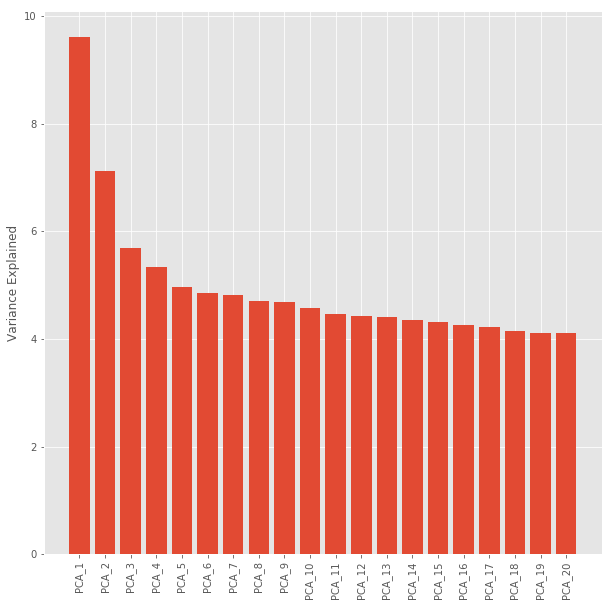

In [99]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10, 10))
plt.bar(pca_range, pca.explained_variance_[:n_col_to_display], align='center')
xticks = plt.xticks(pca_range, pca_names, rotation=90)
plt.ylabel('Variance Explained')
plt.show()

## Classifying positive/negative review with PCA preprocessing

In [100]:
X_train_scaled.shape, y_train.shape

((775, 1000), (775,))

In [101]:
X_train_pca.shape, y_train.shape

((775, 50), (775,))

### Logistic Regression Classifier
#### Build a Logistic Regression Classifier, train with standardized tf-idf vectors

In [102]:
from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression(random_state=42)

model_lrc.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
model_lrc.score(X_train_scaled, y_train)

1.0

In [104]:
model_lrc.score(X_test_scaled, y_test)

0.5675675675675675

Very overfitting!

#### Use (Stardardized + PCA) tf-idf vectors as features

In [105]:
from sklearn.linear_model import LogisticRegression

model_lrc_pca = LogisticRegression(random_state=42)

model_lrc_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
model_lrc_pca.score(X_train_pca, y_train)

0.7948387096774193

In [107]:
model_lrc_pca.score(X_test_pca, y_test)

0.6486486486486487

By comparing the results from PCA and non-PCA, we can see that the Stardardized + PCA has much reduced the overfitting probelm.

#### Plot the coefficients against principal components


In [108]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, model_lrc.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'coeff']
df_coeffs

,PCs,coeff
43,PC_44,0.418505
34,PC_35,0.205765
7,PC_8,0.198779
0,PC_1,0.173456
32,PC_33,0.141039
45,PC_46,0.121657
3,PC_4,0.103782
19,PC_20,0.092693
33,PC_34,0.087564
44,PC_45,0.079570


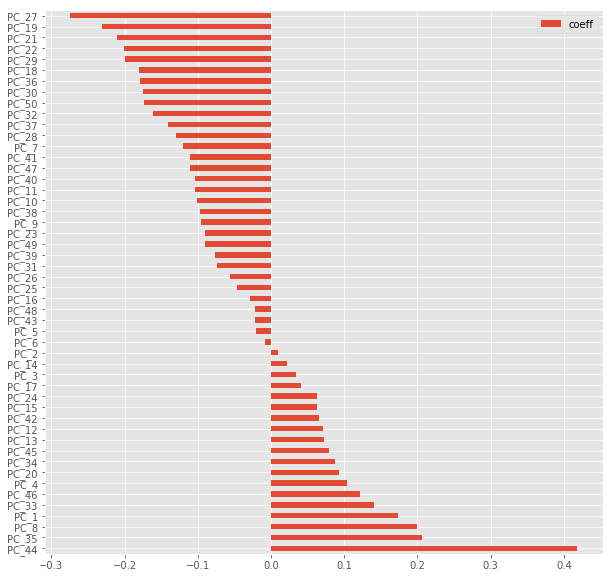

In [109]:
ax = df_coeffs.plot.barh(figsize=(10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

## For each cluster, which restaurant can best represent ("define") its cluster?

Here I define the "best" representation of a cluster as the value point that is closest to its cluster center, i.e. the distance between the point and the cluster center is the smallest.  That point is defined as the most representative of its cluster.

In [119]:
restaurant = df.name.unique()
best_rep = kmeans.cluster_centers_.argsort()[:, -1] 
# argsort orders from small to big, -1 is used to select the one with highest weight in the centroid vector.
for i, rep in enumerate(best_rep):
    print "Cluster %i: Best represent Restaurant %s" % (i, restaurant[i] )

Cluster 0: Best represent Restaurant Delmonico Steakhouse
Cluster 1: Best represent Restaurant Bavette's Steakhouse & Bar
Cluster 2: Best represent Restaurant Michael Mina
Cluster 3: Best represent Restaurant Sin City Thai Restaurant
Cluster 4: Best represent Restaurant Fresh Buffet
Cluster 5: Best represent Restaurant Smashburger
Cluster 6: Best represent Restaurant Ichi Ramen House
Cluster 7: Best represent Restaurant Woo Chun Korean BBQ
